# Soal 14

1. [Tentukan koefisien regresi dari model y](#1)
2. [Apa korelasi antara x1 dan x2](#2)
3. [Prediksi nilai y menggunakan x1 dan x2](#3)
4. [Prediksi nilai y hanya dengan menggunakan x1](#4)
5. [Prediksi nilai y hanya dengan menggunakan x2](#5)
6. [Jelaskan hasil yang diperoleh di nomor 3-5, apakah hasilnya kontradiksi satu sama lain](#6)
7. [Buat model y baru dari observasi tambahan](#7)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import outliers_influence
from sklearn.linear_model import LinearRegression

%matplotlib inline

## 1

In [3]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

In [15]:
x1

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
       2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
       4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
       8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
       8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
       1.69830420e-01, 8.78142503e-01, 9.83468338e-02, 4.21107625e-01,
       9.57889530e-01, 5.33165285e-01, 6.91877114e-01, 3.15515631e-01,
       6.86500928e-01, 8.34625672e-01, 1.82882773e-02, 7.50144315e-01,
       9.88861089e-01, 7.48165654e-01, 2.80443992e-01, 7.89279328e-01,
       1.03226007e-01, 4.47893526e-01, 9.08595503e-01, 2.93614148e-01,
       2.87775339e-01, 1.30028572e-01, 1.93669579e-02, 6.78835533e-01,
       2.11628116e-01, 2.65546659e-01, 4.91573159e-01, 5.33625451e-02,
      

In [16]:
x2

array([ 0.2400745 ,  0.15794213, -0.03056321,  0.23396375,  0.09638742,
        0.12237042,  0.07089729,  0.15270456,  0.21703988,  0.31041353,
        0.22942723,  0.35451061,  0.0351599 ,  0.4768151 ,  0.02587592,
        0.44818215,  0.32854419,  0.29786056,  0.03266497,  0.0351777 ,
        0.44272172,  0.49186479,  0.12232672,  0.35052099,  0.37619449,
        0.51710654, -0.00219075,  0.14197816,  0.12526437,  0.4984291 ,
       -0.06031777,  0.22749206,  0.55300041,  0.17121258,  0.31931671,
        0.16101927,  0.20593873,  0.44882878,  0.0937602 ,  0.28912056,
        0.52948514,  0.24285449,  0.13635245,  0.23306243,  0.16375477,
        0.26483682,  0.45183606,  0.06929091,  0.27126326,  0.26172446,
       -0.17611471,  0.46303417,  0.26857913,  0.1665745 ,  0.12585978,
        0.1130158 ,  0.26896677,  0.01297222,  0.17164695,  0.40493293,
        0.1304479 ,  0.14467492,  0.39925771,  0.0926555 ,  0.10516283,
        0.27260493,  0.31324035,  0.24726997,  0.55918599,  0.36

In [17]:
y

array([2.94973535, 3.26171738, 3.3225169 , 2.38754641, 3.00249785,
       1.90158672, 1.12123085, 3.05048054, 3.36183172, 4.46398341,
       2.79677017, 2.85943012, 2.98221356, 4.14001649, 2.34320304,
       3.40227696, 4.09351143, 3.57623054, 4.19523208, 3.51781299,
       4.39335545, 2.45664425, 3.26586565, 3.91008373, 4.67658832,
       4.98878738, 1.76855301, 2.94470863, 1.81493472, 5.86069181,
       0.84664667, 1.14977431, 2.43095792, 2.22713876, 2.36043384,
       4.63541595, 3.10828398, 2.46122419, 3.17908759, 3.00050086,
       2.89971434, 4.44502658, 3.22515589, 3.2135207 , 3.66311845,
       3.10433968, 5.56969142, 3.11075645, 4.2157352 , 2.44797718,
       0.76615511, 5.94594997, 1.9580558 , 2.38222781, 2.32050575,
       1.93723538, 3.47159468, 2.499179  , 3.89112545, 5.31315481,
       2.12333866, 1.63839372, 2.3262595 , 2.19040067, 0.45725996,
       3.97860412, 2.92334783, 2.79297424, 4.05505383, 1.88698526,
       3.09688172, 2.97441318, 2.92031791, 3.31127075, 4.67251

[kembali ke atas](#Soal-14)

## 2

In [4]:
np.corrcoef(x1, x2)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

In [5]:
np.correlate(x1, x2)

array([16.27190176])

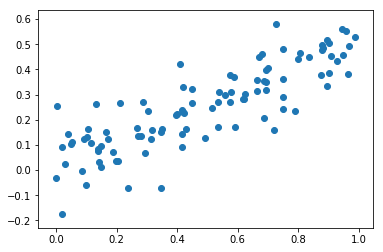

In [6]:
plt.scatter(x1, x2)
plt.show()

Koefisen korelasi x1 dan x2 ialah 0.839

[kembali ke atas](#Soal-14)

## 3

In [18]:
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y' : y
})
data.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
x1    100 non-null float64
x2    100 non-null float64
y     100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [20]:
model = smf.ols('y ~ x1 + x2', data).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           4.40e-07
Time:                        16:10:12   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value dari x1 cukup besar. p-value dari x3 kurang dari 0.05. x1 tidak memiliki hubungan yang signifikan dengan y

Sebenarnya kita bisa menggunakan dua buah cara yaitu

    1. smf.ols
    2. sklearn.linear_model.LinearRegression

silahkan dipilih yang mana lebih disukai

In [22]:
data_sklearn = pd.DataFrame({
    'x1': x1,
    'x2': x2
})

In [32]:
# menggunakan sklearn
linear_model = LinearRegression()
model_sklearn = linear_model.fit(data_sklearn, y)

In [33]:
model_sklearn.coef_

array([0.70462854, 2.50240496])

In [34]:
model_sklearn.intercept_

2.1892843976248217

[kembali ke atas](#Soal-14)

## 4

In [36]:
model_4 = smf.ols('y ~ x1', data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           6.68e-07
Time:                        16:29:01   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

nilai p-value koefisien x1 mendekati nol

$H_0 : \beta_1 \neq 0$ 

maka dari itu, $H_0$ ditolak

[kembali ke atas](#Soal-14)

## 5

In [37]:
model_5 = smf.ols('y ~ x2', data).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.09e-07
Time:                        16:33:15   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

nilai p-value koefisien x2 mendekati nol

$H_0 : \beta_1 \neq 0$ 

maka dari itu, $H_0$ ditolak

[kembali ke atas](#Soal-14)

## 6

x1 dan x2 memiliki korelasi yang tinggi. sehingga jika x1 dan x2 dimasukkan bersamaan sebagai prediktor, maka hasilnya akan bruk seperti pada nomor 3. Ini dinamakan efek collinearity

[kembali ke atas](#Soal-14)

## 7

In [38]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [39]:
x1.shape

(101,)

In [40]:
x1

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
       2.04452250e-01, 8.78117436e-01, 2.73875932e-02, 6.70467510e-01,
       4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01,
       8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
       8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
       1.69830420e-01, 8.78142503e-01, 9.83468338e-02, 4.21107625e-01,
       9.57889530e-01, 5.33165285e-01, 6.91877114e-01, 3.15515631e-01,
       6.86500928e-01, 8.34625672e-01, 1.82882773e-02, 7.50144315e-01,
       9.88861089e-01, 7.48165654e-01, 2.80443992e-01, 7.89279328e-01,
       1.03226007e-01, 4.47893526e-01, 9.08595503e-01, 2.93614148e-01,
       2.87775339e-01, 1.30028572e-01, 1.93669579e-02, 6.78835533e-01,
       2.11628116e-01, 2.65546659e-01, 4.91573159e-01, 5.33625451e-02,
      

In [41]:
new_data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y' : y
})

In [42]:
new_data.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
x1    101 non-null float64
x2    101 non-null float64
y     101 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


In [44]:
model_1 = smf.ols('y ~ x1 + x2', new_data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           5.51e-08
Time:                        16:44:32   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model_2 = smf.ols('y ~ x1', new_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           9.15e-06
Time:                        16:44:58   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

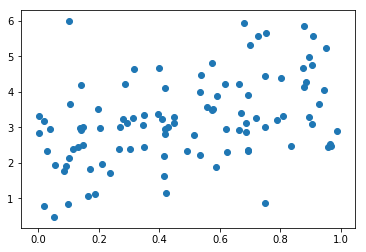

In [49]:
plt.scatter(x1, y)

In [46]:
model_3 = smf.ols('y ~ x2', new_data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           7.41e-09
Time:                        16:45:09   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

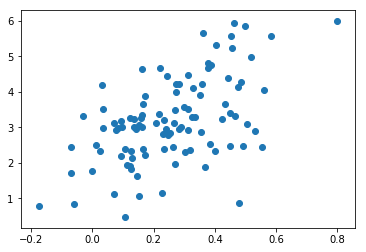

In [50]:
plt.scatter(x2, y)

**Model 1**

Nilai $R^2$ bertambah, koefisien x1 bertambah sementara itu koefisien x2 menurun

**Model 2**

Nilai $R^2$ menurun, koefisien x1 menurun

**Model 3**

Nilai $R^2$ naik, koefisien x2 naik

Untuk outlier dan leverage point silahkan dibuat residual plotnya seperti pada latihan ch3 nomor 8.

In [59]:
# Batas leverage point untuk multiple regression
(2 + 1) / 101

0.0297029702970297

In [60]:
# batas leverage point untuk linear regression
(1 + 1) / 101

0.019801980198019802

In [52]:
# model 1
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# model_f = 'mpg ~ horsepower'

new_data.reset_index(drop=True, inplace=True)

# model = smf.ols(formula=model_f, data=df_data)

# model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_1.fittedvalues

# model residuals
model_residuals = model_1.resid

# normalized residuals
model_norm_residuals = model_1.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_1.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_1.get_influence().cooks_distance[0]


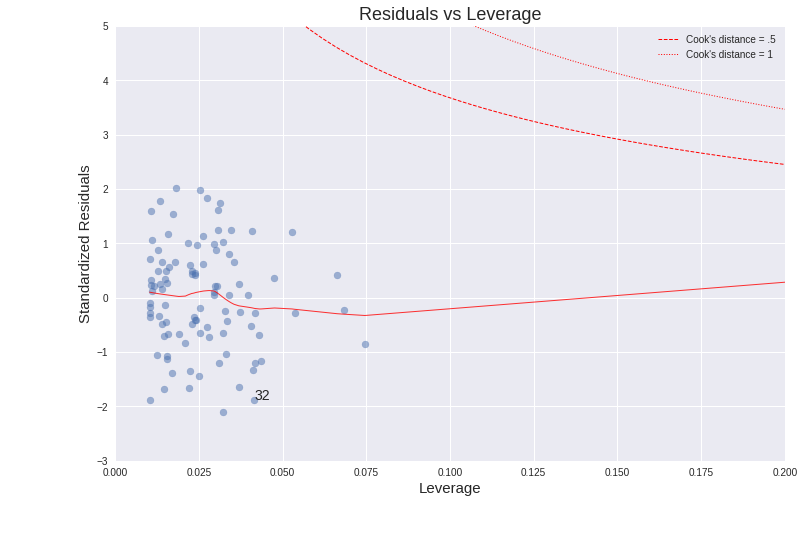

In [54]:
# Residuals vs Leverages
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

Jika dilihat dari batasnya, banyak titik yang termasuk dalam high leverage points (melebihi 0.029)

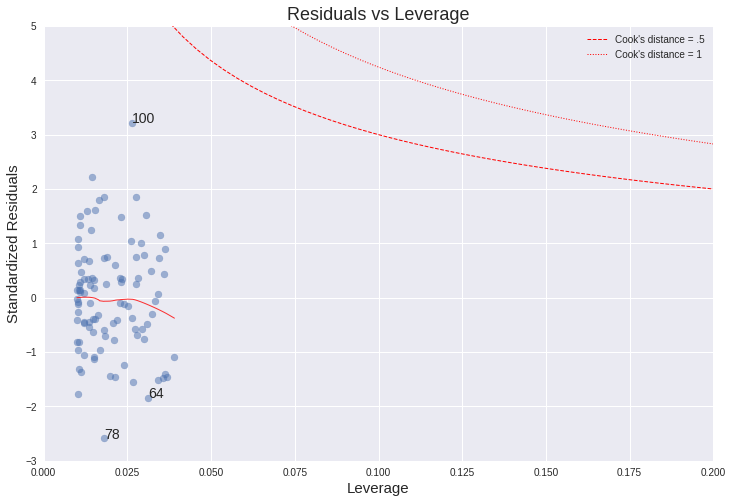

In [55]:
# model 2
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# model_f = 'mpg ~ horsepower'

new_data.reset_index(drop=True, inplace=True)

# model = smf.ols(formula=model_f, data=df_data)

# model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_2.fittedvalues

# model residuals
model_residuals = model_2.resid

# normalized residuals
model_norm_residuals = model_2.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_2.get_influence().cooks_distance[0]

# Residuals vs Leverages
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_2.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

titik 100 bisa dikatakan outlier karena berada diluar rentang -3 sampai 3.

banyak titik yang high leverage point (melebihi 0.019)

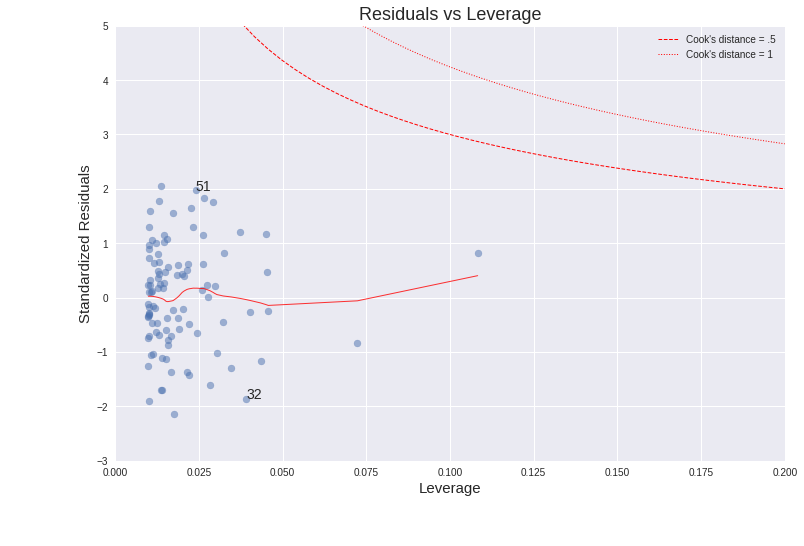

In [56]:
# model 3
# model 1
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# model_f = 'mpg ~ horsepower'

new_data.reset_index(drop=True, inplace=True)

# model = smf.ols(formula=model_f, data=df_data)

# model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_3.fittedvalues

# model residuals
model_residuals = model_3.resid

# normalized residuals
model_norm_residuals = model_3.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_3.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_3.get_influence().cooks_distance[0]

# Residuals vs Leverages
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_3.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

banyak titik yang high leverage point (melebihi 0.019)

[kembali ke atas](#Soal-14)